In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(R"C:\Personal\Python Practice\archive\Expanded_data_with_more_features.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [5]:
df.drop(columns= "Unnamed: 0",index=1,inplace=True)

In [6]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29068.000000,30640.000000,30640.000000,30640.000000
mean,2.145968,66.558322,69.376860,68.417983
std,1.458213,15.361860,14.758722,15.443372
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30640 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30640 non-null  object 
 1   EthnicGroup          28800 non-null  object 
 2   ParentEduc           28795 non-null  object 
 3   LunchType            30640 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29450 non-null  object 
 6   PracticeSport        30009 non-null  object 
 7   IsFirstChild         29736 non-null  object 
 8   NrSiblings           29068 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29685 non-null  object 
 11  MathScore            30640 non-null  int64  
 12  ReadingScore         30640 non-null  int64  
 13  WritingScore         30640 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.5+ MB


In [8]:
df.isnull().sum()    # to check the null values

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1829
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3133
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [9]:
df.rename(columns={"ParentEduc":"Parent Education"},inplace=True)   # to replace the column name

In [10]:
df["Gender"] = df["Gender"].str.replace("female","Female")   # to replace the value with some other value

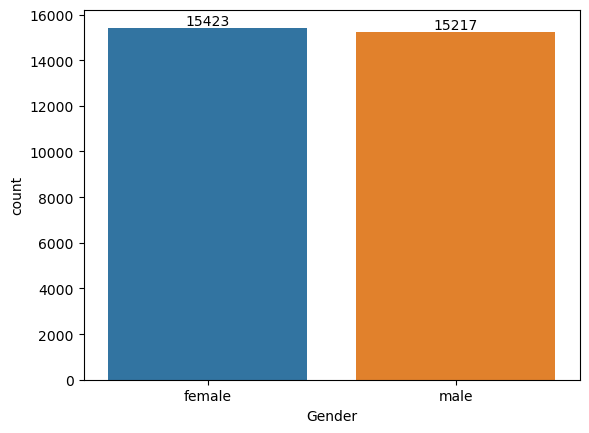

In [11]:
df_gender = sns.countplot(data=df,x = "Gender")
for bars in df_gender.containers:
    df_gender.bar_label(bars)

In [18]:
# Do the aggregation on the Gender & Parent Education Column
df_groupby = df.groupby(["Parent Education"]).agg({"MathScore":"mean","ReadingScore":"min"})

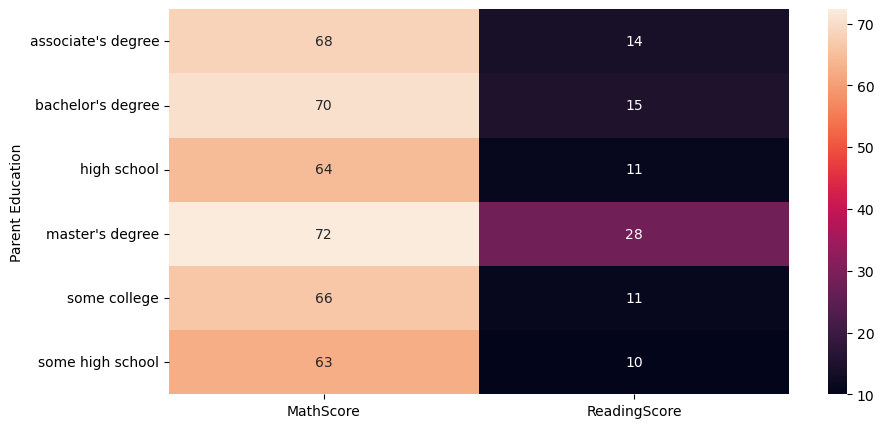

In [34]:
# create a heatmap
plt.figure(figsize=(10,5))     # to adjust the size
sns.heatmap(data = df_groupby,annot=True)    # annot to give the data labels
plt.show()   # to hide the unwanted title

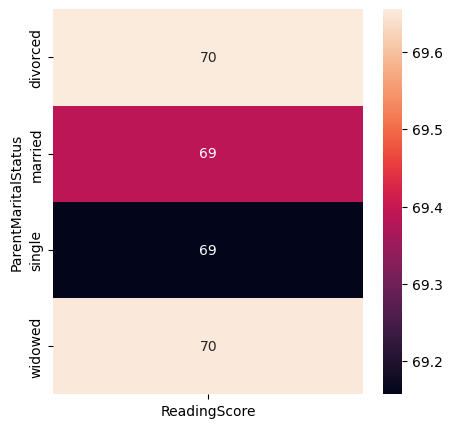

In [38]:
df_groupby_1 = df.groupby(["ParentMaritalStatus"]).agg({"ReadingScore":"mean"})
plt.figure(figsize=(5,5))     # to adjust the size
sns.heatmap(data = df_groupby_1,annot=True) 
plt.show()

In [43]:
df["ParentMaritalStatus"].unique()     #to get the unique values

array(['married', 'single', 'widowed', nan, 'divorced'], dtype=object)

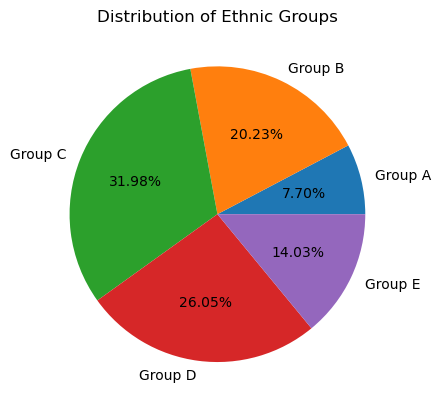

In [70]:
group_A_count = df[df["EthnicGroup"] == "group A"].count()
group_B_count = df[df["EthnicGroup"] == "group B"].count()
group_C_count = df[df["EthnicGroup"] == "group C"].count()
group_D_count = df[df["EthnicGroup"] == "group D"].count()
group_E_count = df[df["EthnicGroup"] == "group E"].count()

list_label = ['Group A',"Group B",'Group C',"Group D",'Group E']
list = [group_A_count["EthnicGroup"],group_B_count["EthnicGroup"],group_C_count["EthnicGroup"],group_D_count["EthnicGroup"],group_E_count["EthnicGroup"]]
plt.pie(list,labels =  list_label,autopct="%1.2f%%")     # autopct="%1.2f%%" to get the percentage
plt.title("Distribution of Ethnic Groups")     # to give the title
plt.show()

[Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '9211'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

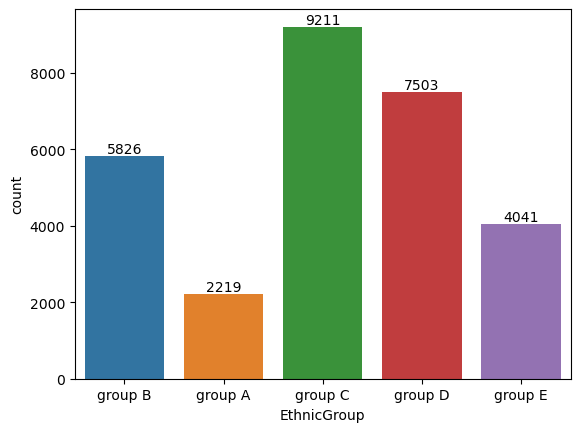

In [75]:
a = sns.countplot(data = df,x = "EthnicGroup")
a.bar_label(a.containers[0])
# for bars in a.containers:
#     a.bar_label(bars)